# 나와 닮은 꼴 연예인 찾기

## 1. 이미지 확인

### 나의 이미지 확인

file_list: ['유효정1.jpg', '유효정2.jpg']


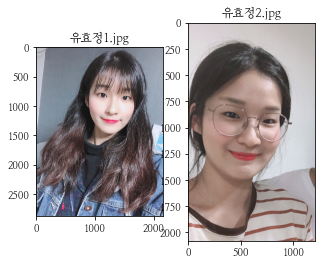

In [57]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/my_face'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#내 얼굴 이미지 리스트를 시각화하기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,5))


for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
    ax.set_title(file_list[i])
plt.show()

fig.tight_layout()

## 2. 얼굴 영역 찾기

In [47]:
#이미지 경로를 입력받아 얼굴 영역만 잘라주는 함수
import face_recognition

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

### 나의 이미지에서 얼굴 영역 찾기

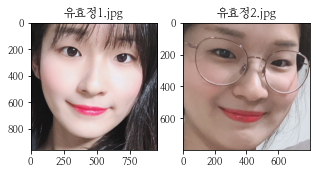

In [58]:
#얼굴 영역 잘라서 시각화하기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,5))

for i, ax in enumerate(axes.flatten()):
    cropped_face = get_cropped_face(dir_path+'/'+file_list[i])
    ax.imshow(cropped_face)
    ax.set_title(file_list[i])
plt.show()

fig.tight_layout()

### 연예인 이미지 확인하기 

연예인 이미지 개수 :  289


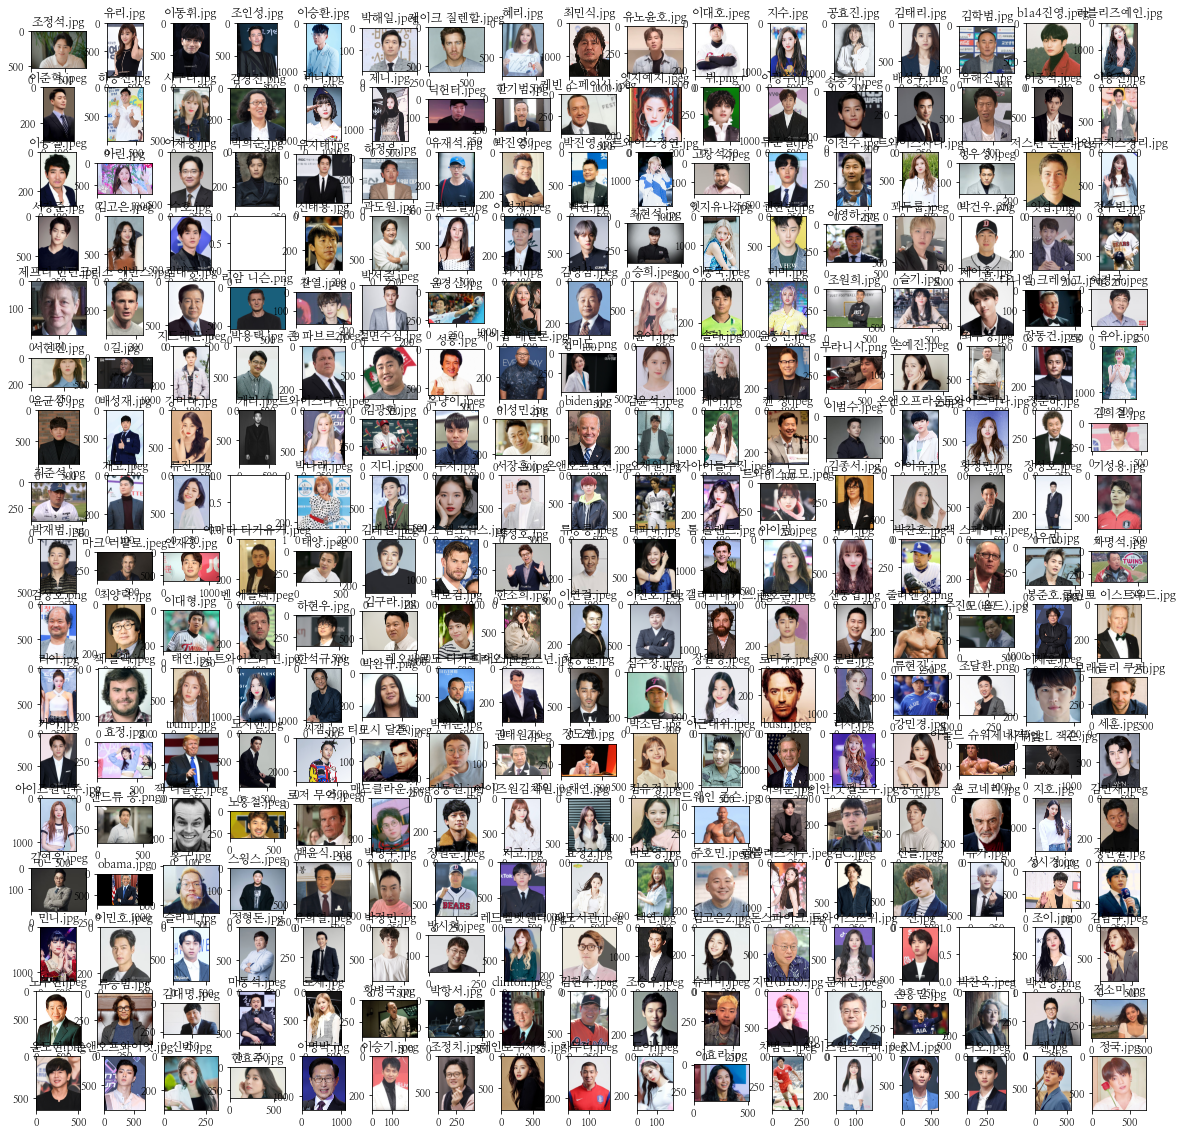

In [37]:
img_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
cel_file_list = os.listdir(img_path)

print('연예인 이미지 개수 : ', len(cel_file_list))


#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#연예인 이미지 리스트를 시각화하기
fig, axes = plt.subplots(nrows=17, ncols=17, figsize=(20,20))

for i, ax in enumerate(axes.flatten()):
    try:
        image = img.imread(img_path+'/'+cel_file_list[i])
        ax.imshow(image)
        ax.set_title(cel_file_list[i])
    except :
        continue   #손상된 파일은 건너뛰고 시각화
plt.show()

fig.tight_layout()

산들.jpeg was removed


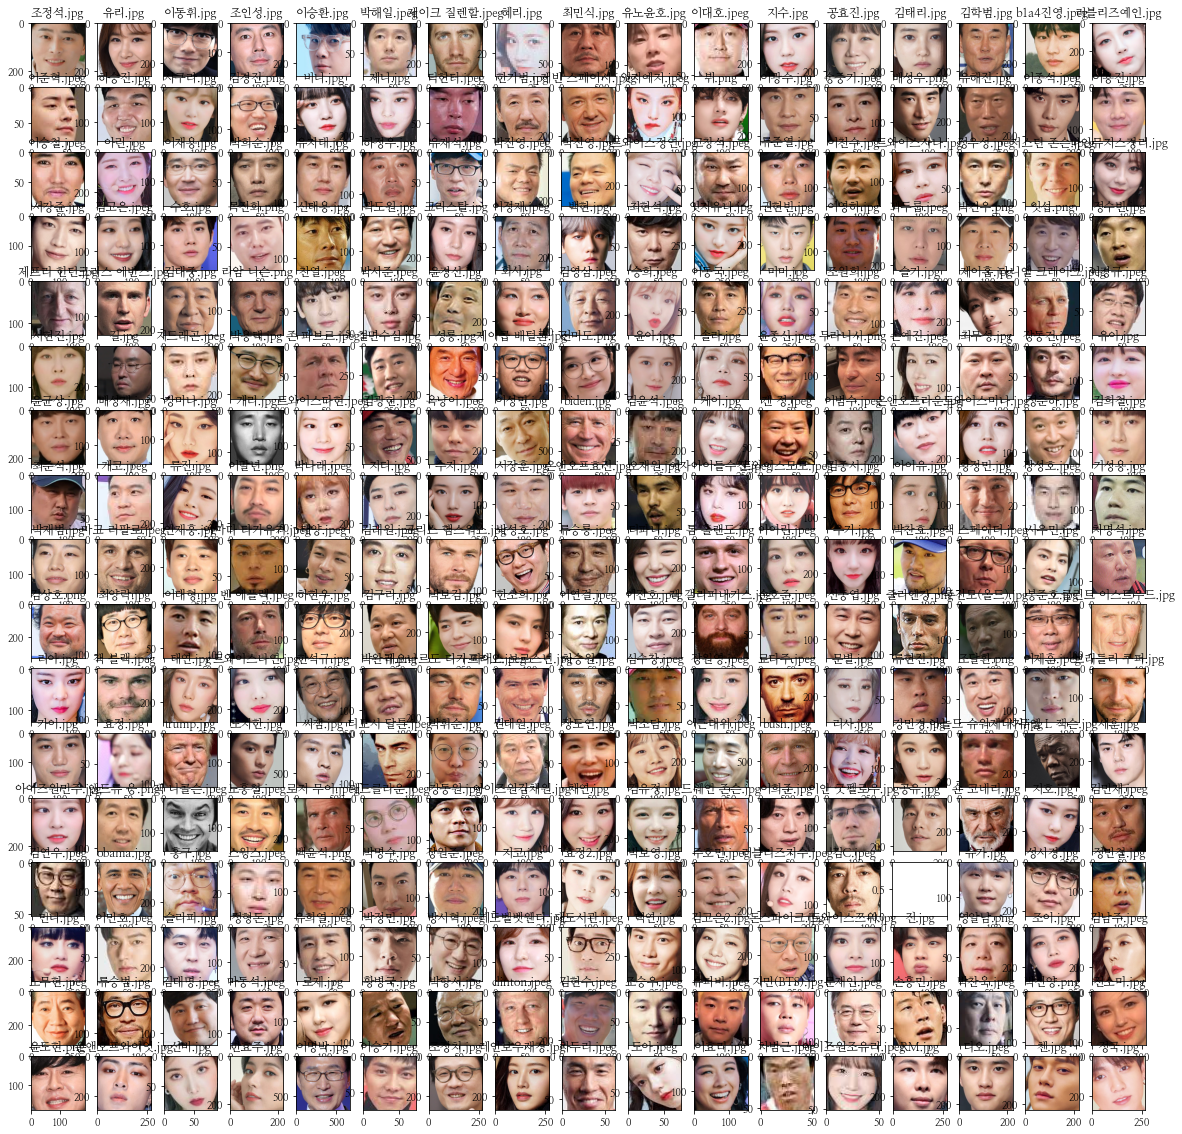

In [54]:
#연예인 얼굴 영역 잘라서 시각화하기
fig, axes = plt.subplots(nrows=17, ncols=17, figsize=(20,20))

for i, ax in enumerate(axes.flatten()):
    try :
        cropped_face = get_cropped_face(img_path+'/'+cel_file_list[i])
        ax.imshow(cropped_face)
        ax.set_title(cel_file_list[i])
    except :
        os.remove(img_path+'/'+cel_file_list[i])  #얼굴 인식이 되지 않는 사진은 삭제
        print(cel_file_list[i], 'was removed')
plt.show()

fig.tight_layout()

## 3. Face Net
- 얼굴 임베딩 추출

### 나의 이미지에서 얼굴 임베딩 추출

In [51]:
#얼굴 영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [52]:
#디렉토리 내 모든 이미지 파일의 임베딩을 구해 딕셔너리에 담아서 리턴하는 함수
#엘리먼트는 사람이름 : 임베딩 벡터 로 함.
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        #얼굴영역 face가 제대로 detect되지 않으면 len(embedding)==0인 경우가 발생하므로 
        #os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담김. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [59]:
#내 사진에서 얼굴 임베딩 딕셔너리 추출
my_embadding_dict = get_face_embedding_dict(dir_path)
my_embadding_dict['유효정1']

array([-0.08696814,  0.13952249, -0.00966176, -0.08558545, -0.15370829,
       -0.04676124, -0.1111893 , -0.0433908 ,  0.15723431, -0.1505141 ,
        0.16247997, -0.08174274, -0.22079028, -0.03848014, -0.09523203,
        0.26320493, -0.22160849, -0.18522505, -0.06005438, -0.02165506,
        0.05405574,  0.0474801 ,  0.02019854,  0.05791143, -0.07398682,
       -0.35884836, -0.04506715, -0.09353814, -0.04353249, -0.1059431 ,
       -0.01467858,  0.03908619, -0.1362581 , -0.00403608,  0.06604999,
        0.08369684, -0.02622655, -0.07908669,  0.18393178, -0.0331321 ,
       -0.32878971,  0.08132513,  0.1003345 ,  0.26964599,  0.2167778 ,
        0.01751208,  0.00538799, -0.1821941 ,  0.16534595, -0.17959981,
       -0.01198655,  0.16466026,  0.03903821,  0.0182259 ,  0.02848182,
       -0.10724114,  0.03892955,  0.10033357, -0.1334551 , -0.05439566,
        0.13307787, -0.04788339, -0.00889923, -0.1279062 ,  0.2928049 ,
        0.04881176, -0.1647138 , -0.21238813,  0.13706984, -0.19

### 연예인 이미지에서 얼굴 임베딩 추출

In [55]:
#연예인 사진에서 얼굴 임베딩 딕셔너리 추출
cel_embadding_dict = get_face_embedding_dict(img_path)
cel_embadding_dict['유리']

array([-9.21950862e-02,  6.99452385e-02,  5.98982126e-02, -5.50635941e-02,
       -1.43817976e-01, -5.57564981e-02, -9.95243341e-02, -8.15872774e-02,
        8.11945945e-02, -1.38201922e-01,  2.15192750e-01, -1.07391618e-01,
       -1.96365923e-01, -3.38341594e-02, -2.22230293e-02,  1.84262291e-01,
       -1.46383107e-01, -1.48997232e-01, -2.53411196e-02, -1.03250947e-02,
        5.26615046e-02, -8.18568747e-03, -4.13853768e-03,  4.66191284e-02,
       -1.12824082e-01, -3.30209166e-01, -7.79797658e-02, -1.16522247e-02,
       -5.13828639e-03, -6.65520057e-02, -5.75515181e-02,  2.65107863e-02,
       -1.78615972e-01, -1.04047731e-02,  8.37780461e-02,  1.10311426e-01,
       -9.79672652e-03, -8.72942656e-02,  1.40624672e-01, -4.31316234e-02,
       -2.72042900e-01,  5.01456531e-03,  1.37735218e-01,  2.14646444e-01,
        1.84313595e-01,  5.41878492e-02, -3.93525586e-02, -1.41126648e-01,
        1.48813739e-01, -1.48584038e-01,  4.09904197e-02,  1.67133108e-01,
        6.07862659e-02,  

In [94]:
cel_embadding_dict.update(my_embadding_dict)
print('cel_embadding_dict의 첫 키의 값:',cel_embadding_dict['조정석'])
print('my_embadding_dict의 첫 키의 값:',cel_embadding_dict['유효정1'])

cel_embadding_dict의 첫 키의 값: [-0.07340842  0.10227115 -0.00807189 -0.08098849 -0.13060047 -0.01695806
 -0.12249412 -0.14454752  0.12465029 -0.08456326  0.13299    -0.02859897
 -0.16178344 -0.03821836 -0.07462908  0.15479408 -0.24025147 -0.17796363
  0.01310275  0.00519662  0.1151472   0.016806   -0.01797603  0.0439501
 -0.11204985 -0.26210138 -0.13419956 -0.09778788  0.05761133 -0.03007461
 -0.06808574 -0.02722421 -0.17473459 -0.028126    0.0451329   0.06149992
  0.05097397 -0.09502467  0.16626979 -0.00120839 -0.2365053   0.08158404
  0.08766471  0.19410938  0.17082022  0.02914351  0.01986494 -0.17484149
  0.1527016  -0.109332    0.04030726  0.1615693   0.05518081  0.07796017
 -0.00506155 -0.15113789  0.07947389  0.12686533 -0.14065517  0.03271145
  0.08623707 -0.00253614  0.02171804 -0.05446887  0.19294494  0.08286834
 -0.03825885 -0.27658817  0.11542197 -0.16899133 -0.16109094  0.09322126
 -0.14639312 -0.12154198 -0.27600479 -0.05960359  0.40275401  0.12572435
 -0.20033917  0.09357791

#### 나의 이미지의 얼굴 임베딩 딕셔너리와 연예인 이미지의 얼굴 임베딩 딕셔너리 병합
- 나의 이미지 파일과 연예인 이미지 파일의 경로가 다름.
- 나의 이미지에서 도출 된 임베딩 딕셔너리 my_embadding_dict
- 연예인 이미지에서 도출 된 임베딩 딕셔너리 cel_embadding_dict
- 임베딩 거리 측정을 위해 하나의 임베딩 딕셔너리로 만들어야 함.
- 때문에 dict.update를 이용해 두 딕셔너리를 병합시킴
- update 된 딕셔너리는 할당이 되지 않기 때문에 병합 된 딕셔너리는 cel_embadding_dict가 됨

## 4. 얼굴 임베딩 사이의 거리 측정

### 나의 이미지끼리 임베딩 거리 측정

In [83]:
import numpy as np

my_distance = np.linalg.norm(cel_embadding_dict['유효정1']-cel_embadding_dict['유효정2'])

#안경을 안 쓴 1 파일과 안경을 쓴 2 파일의 얼굴 임베딩 거리 계산
print('안경을 쓰고(유효정2) 안 쓰고(유효정1)의 차이:', my_distance)

안경을 쓰고(유효정2) 안 쓰고(유효정1)의 차이: 0.4261169515189021


### 나의 이미지와 닮은 연예인 이미지 찾기

In [73]:
#파일명의 사람 이름 2개를 입력 값으로 받아 두 사람의 얼굴 임베딩 사이의 거리를 구하는 함수
#L2 Distance 사용
def get_distance(name1, name2):
    return np.linalg.norm(ce|_embadding_dict[name1]-cel_embadding_dict[name2], ord=2)

#name1과 name2의 거리를 비교하는 함수를 생성하되, 
#name1은 미리 지정하고, name2는 호출시에 인자로 받도록 함.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [106]:
import pandas as pd

#입력받은 임의의 이름에 대해 다른 이미지의 임베딩 거리를 정렬해 추출하는 함수
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(cel_embadding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    #결과 시각화를 위해 빈 list 생성
    rank = []
    name = []
    distance = []
    
    idx = 1
    for i in range(top+1):
        #첫번째로 나오는 이름은 자기 자신일 것이므로 제외 
        if i == 0 :   
            continue
        
        #나의 다른 사진도 제외
        elif sorted_faces[i][0].startswith('유효정'):   
            continue 
        
        #결과 시각화를 위해 각종 값들을 빈 list에 넣음
        else:
            rank.append(idx)
            name.append(sorted_faces[i][0])
            distance.append(sort_key_func(sorted_faces[i][0]))
            
            idx += 1
    
    result = {'Rank' : rank, 'Name' : name, 'Distance' : distance}
    
    return pd.DataFrame(result)

In [107]:
print('안경 안 쓴 나와 가장 닮은 사람은 누굴까요?')
get_nearest_face('유효정1')

안경 안 쓴 나와 가장 닮은 사람은 누굴까요?


Rank     Name  Distance
0     1      박소담  0.382785
1     2       우기  0.403374
2     3   온앤오프라운  0.405845
3     4  나인뮤지스경리  0.405845
4     5      강미나  0.426546

In [108]:
print('안경 쓴 나와 가장 닮은 사람은 누굴까요?')
get_nearest_face('유효정2')

안경 쓴 나와 가장 닮은 사람은 누굴까요?


Rank Name  Distance
0     1   유리  0.451437
1     2  박소담  0.452204
2     3  강민경  0.459332
3     4  전미도  0.465978
4     5  슈퍼비  0.478974

## 5. 결과 시각화
- Distance를 닮은 정도의 점수로 표현하고자 함.
- 퍼센트로 닮은 정도를 표한하기 위해 1-distance를 하여 100을 곱해줌. 
- 닮은 순위대로 해당 연예인 사진을 출력

In [190]:
#안경 안 쓴 나의 이미지와 닮은 연예인 결과

data1 = get_nearest_face('유효정1')
data1["Percent"] = round(((1 - data1['Distance'])*100),2)

data1

Rank     Name  Distance  Percent
0     1      박소담  0.382785    61.72
1     2       우기  0.403374    59.66
2     3   온앤오프라운  0.405845    59.42
3     4  나인뮤지스경리  0.405845    59.42
4     5      강미나  0.426546    57.35

In [191]:
#안경 쓴 나의 이미지와 닮은 연예인 결과

data2 = get_nearest_face('유효정2')
data2["Percent"] = round(((1 - data2['Distance'])*100),2)

data2

Rank Name  Distance  Percent
0     1   유리  0.451437    54.86
1     2  박소담  0.452204    54.78
2     3  강민경  0.459332    54.07
3     4  전미도  0.465978    53.40
4     5  슈퍼비  0.478974    52.10

['원본', '61.72%', '59.66%', '59.42%', '59.42%', '57.35%']


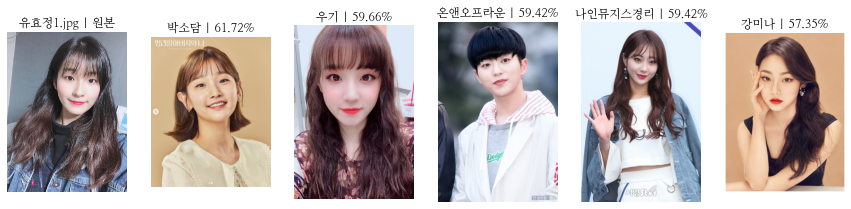

In [192]:
#안경을 안 쓴 나의 이미지와 닮은 연예인 이미지 출력

import glob

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/my_face'
file_list = os.listdir(dir_path)

my_file_path1 = []
my_file_path1.append(dir_path + '/' + file_list[0])

img_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
cel_file_list = os.listdir(img_path)

similar_file_list = list(data1['Name'])

similar_file_path = []
for file in cel_file_list :
    for name in similar_file_list :
        if name in file:
            similar_file_path.append(img_path + '/'+file)
        else :
            continue
            
similar_file_path.reverse()
similar_file_path[-1], similar_file_path[-2] = similar_file_path[-2], similar_file_path[-1]

file_list1 = my_file_path1 + similar_file_path

file_name1 = [file_list[0]] + similar_file_list
percent = list(data1["Percent"])

for i in range(len(percent)) :
    percent[i] = str(percent[i])+'%'

percent.insert(0, '원본')
print(percent)
    

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,5))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(file_list1[i])
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(file_name1[i]+' | '+percent[i])
plt.show()

fig.tight_layout()

['원본', '54.86%', '54.78%', '54.07%', '53.4%', '52.1%']


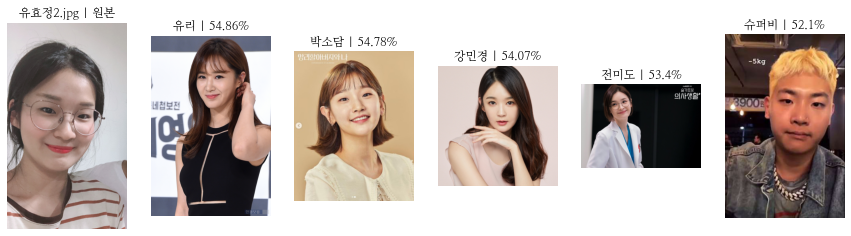

In [193]:
#안경을 쓴 나의 이미지와 닮은 연예인 이미지 출력

import glob

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/my_face'
file_list = os.listdir(dir_path)

my_file_path1 = []
my_file_path1.append(dir_path + '/' + file_list[1])

img_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
cel_file_list = os.listdir(img_path)

similar_file_list = list(data2['Name'])

similar_file_path = []
for file in cel_file_list :
    for name in similar_file_list :
        if name in file:
            similar_file_path.append(img_path + '/'+file)
        else :
            continue
            
similar_file_path.reverse()
similar_file_path[1], similar_file_path[-1] = similar_file_path[-1], similar_file_path[1]

similar_file_path.pop(0)

similar_file_path[1], similar_file_path[2] = similar_file_path[2], similar_file_path[1]

file_list2 = my_file_path1 + similar_file_path

file_name2 = [file_list[1]] + similar_file_list
percent = list(data2["Percent"])

for i in range(len(percent)) :
    percent[i] = str(percent[i])+'%'

percent.insert(0, '원본')
print(percent)
    

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,5))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(file_list2[i])
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(file_name2[i]+' | '+percent[i])
plt.show()

fig.tight_layout()

---

## 나와 닮은 꼴 연예인 찾기 정리
1. 데이터 불러오기 
- 나는 안경을 썼다 안썼다 하기 때문에 안경을 낀 사진과 끼지 않은 사진의 결과가 어떻게 다를지 궁금하여 두 종류의 사진을 넣어서 비교했다.
- 아지트에서 공유 받은 셀럽 사진에 여자 연예인 비율이 적은 것 같아서 공유 받은 사진에 없는 여자 연예인을 몇 명 더 추가하여 데이터를 만들었다.
- 연예인 사진 중 얼굴 인식을 하지 못하는 사진이 있어서 과감하게 예외처리를 주어 삭제했다.
- 내 얼굴과 연예인 얼굴들을 시각화 하여 인식한 얼굴 부분만 크롭한 사진들도 시각화 하였다.

2. 임베딩 거리 계산
- 내 사진 2개의 거리를 먼저 비교했는데 안경이 꽤 큰 변수인지 0.5보다는 가깝지만 0.4261169515189021로 생각보다 먼 수치가 나왔다.
- 연예인과 비교 했을 때, 안경을 끼지 않은 경우와 낀 경우 모두 공통적으로 박소담이 결과에 포함되었다. 
- 안경을 안 낀 경우에는 박소담과의 임베딩 거리는 0.382785로 내 사진 두장의 거리보다 가깝다...(?)

3. 결과 시각화
- 줄글로 print 하는 것 보다 pandas DataFrame을 이용하여 결과를 출력하면 보기도 편할 것 같아서 처음부터 dataframe으로 결과를 출력했다.
- 닮은 정도를 거리로 보는 것 보다 퍼센트로 보는 것이 편할 것 같아서 1에서 거리를 뺀 값에 100을 곱하여 닮은 정도를 나타냈다.
- dataframe으로만 보면 실제 사진은 볼 수 없어 matplotlib를 사용하여 닮은 연예인들의 사진도 함께 시각화 하였다.
- 원본 사진인 내 사진 옆으로 닮은 정도가 높은 순서대로 이름과 퍼센트를 이미지와 함께 출력되도록 했다.

---